In [248]:
 import matplotlib.pyplot as plt
 import cv2
 import numpy as np
 from google.colab.patches import cv2_imshow

In [249]:
img=cv2.imread('gazebo_img.jpg')

In [250]:
 img=img[50:,:]

In [251]:
img = cv2.resize(img, (400, 400)) 

In [252]:
img.shape

(400, 400, 3)

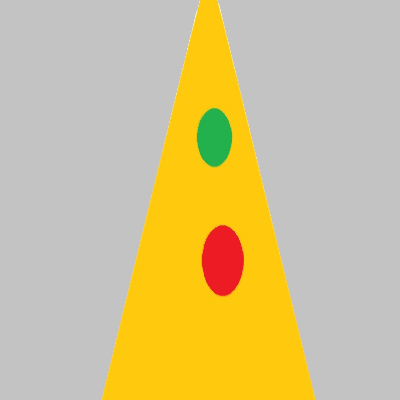

In [253]:
cv2_imshow(img)

In [254]:
color_boundaries = [
	([17, 15, 100], [90, 96, 255]), #red
	([20, 90, 4], [90, 255, 100]), #green
	([1, 150, 150], [120, 255, 255]) # yellow
]

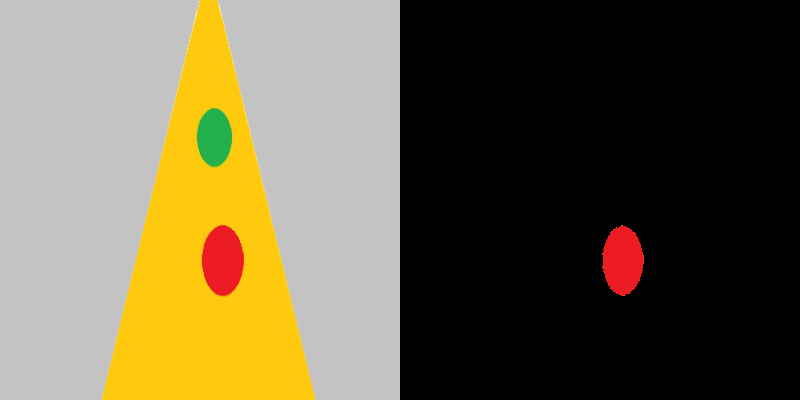

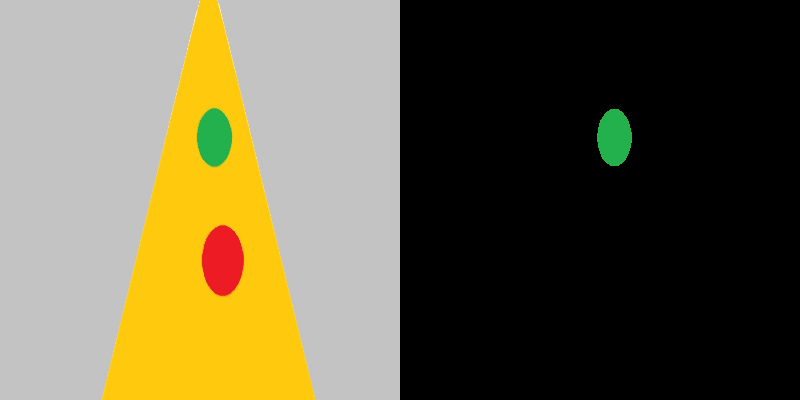

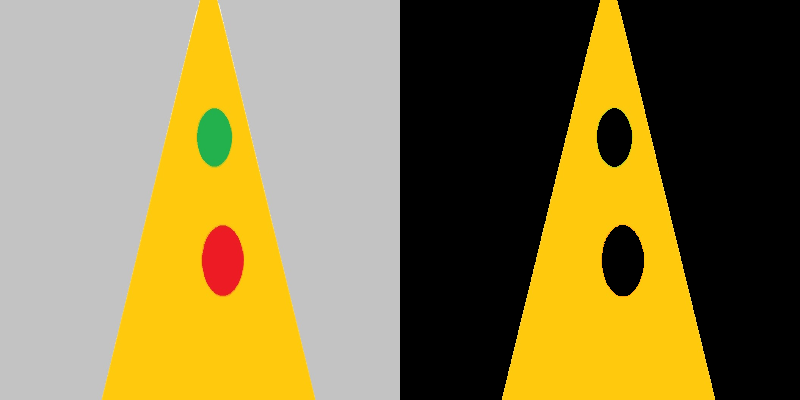

In [255]:
masks=[]
for (lower,upper) in color_boundaries:
  lower=np.array(lower,dtype='uint8')
  upper=np.array(upper,dtype='uint8')
  mask=cv2.inRange(img,lower,upper)
   
  output=cv2.bitwise_and(img,img,mask=mask)
  masks.append(output)
  cv2_imshow(np.hstack([img,output]))
  cv2.waitKey(0)

In [256]:
segment=masks[0]+masks[1]+masks[2]

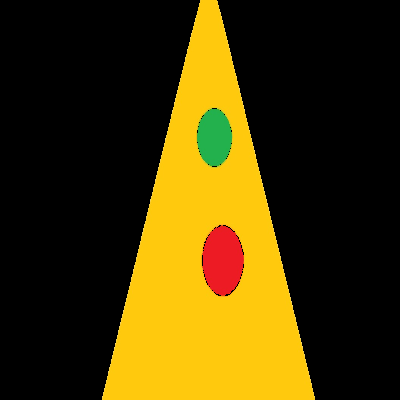

In [257]:
cv2_imshow(segment)

In [258]:
gray=cv2.cvtColor(segment,cv2.COLOR_BGR2GRAY)

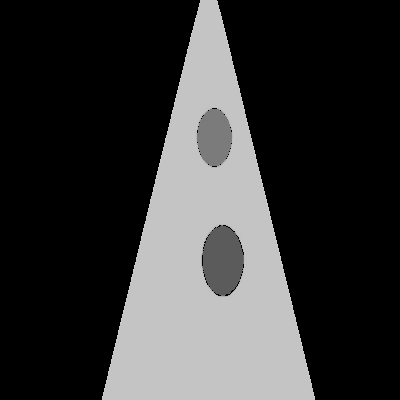

In [259]:
cv2_imshow(gray)

In [260]:
kernel = np.ones((5,5), np.uint)
gray=cv2.dilate(gray, kernel, iterations=2) 

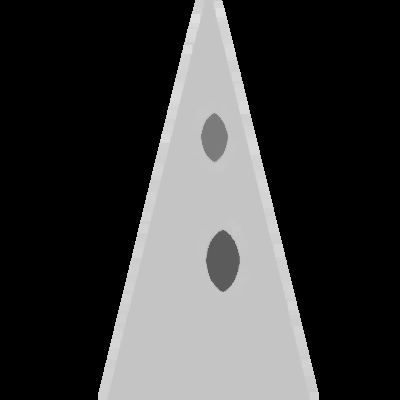

In [261]:
cv2_imshow(gray)

In [262]:
ret,thresh1 = cv2.threshold(gray,10,255,cv2.THRESH_BINARY)

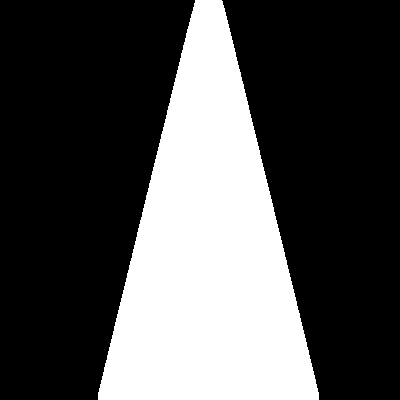

In [263]:
cv2_imshow(thresh1)

In [264]:
lane = cv2.Canny(thresh1,100,200)

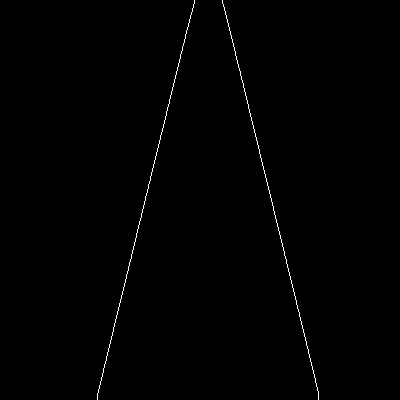

In [265]:
cv2_imshow(lane)

In [266]:
def calculate_lines(frame, lines):
    # Empty arrays to store the coordinates of the left and right lines
    left = []
    right = []
    # Loops through every detected line
    for line in lines:
        # Reshapes line from 2D array to 1D array
        x1, y1, x2, y2 = line.reshape(4)
        # Fits a linear polynomial to the x and y coordinates and returns a vector of coefficients which describe the slope and y-intercept
        parameters = np.polyfit((x1, x2), (y1, y2), 1)
        slope = parameters[0]
        y_intercept = parameters[1]
        # If slope is negative, the line is to the left of the lane, and otherwise, the line is to the right of the lane
        if slope < 0:
            left.append((slope, y_intercept))
        else:
            right.append((slope, y_intercept))
    # Averages out all the values for left and right into a single slope and y-intercept value for each line
    left_avg = np.average(left, axis = 0)
    right_avg = np.average(right, axis = 0)
    # Calculates the x1, y1, x2, y2 coordinates for the left and right lines
    left_line = calculate_coordinates(frame, left_avg)
    right_line = calculate_coordinates(frame, right_avg)
    return np.array([left_line, right_line])

def calculate_coordinates(frame, parameters):
    slope, intercept = parameters
    # Sets initial y-coordinate as height from top down (bottom of the frame)
    y1 = frame.shape[0]
    # Sets final y-coordinate as 150 above the bottom of the frame
    y2 = int(y1 -400)#- 150)
    # Sets initial x-coordinate as (y1 - b) / m since y1 = mx1 + b
    x1 = int((y1 - intercept) / slope)
    # Sets final x-coordinate as (y2 - b) / m since y2 = mx2 + b
    x2 = int((y2 - intercept) / slope)
    return np.array([x1, y1, x2, y2])
def visualize_lines(frame, lines):
    # Creates an image filled with zero intensities with the same dimensions as the frame
    lines_visualize = np.zeros_like(frame)
    # Checks if any lines are detected
    if lines is not None:
        for x1, y1, x2, y2 in lines:
            # Draws lines between two coordinates with green color and 5 thickness
            cv2.line(lines_visualize, (x1, y1), (x2, y2), (0, 255, 0), 5)
    return lines_visualize


In [267]:
hough = cv2.HoughLinesP(lane, 2, np.pi / 180, 100, np.array([]), minLineLength = 200, maxLineGap = 50)

In [268]:
lines = calculate_lines(img, hough)

In [269]:
lines_visualize = visualize_lines(img, lines)

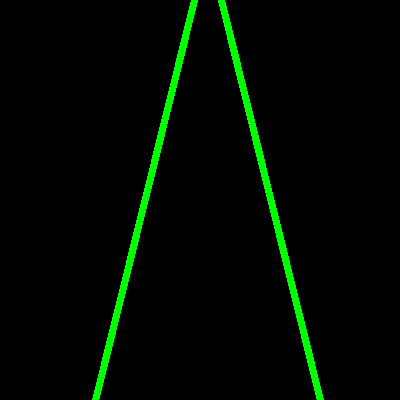

In [270]:
cv2_imshow( lines_visualize)

In [271]:
print(lines[0])
print(lines[1]) # format is x1 y1 x2 y2

[ 95 400 194   0]
[320 400 221   0]
